# CmpE 482 - Spring2021 - Assignment 1

**Student ID:** 2016400099 \
**Name Surname:** Emre Girgin \
**Date:** 18.04.2021

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Question 1:

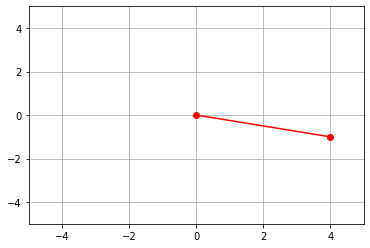

In [2]:
v = np.array([4,-1], dtype="float64")

plt.plot((0,v[0]), (0,v[1]), 'ro-')
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.grid()
plt.show()

### a.

* 30 degrees are equal to $\pi/6$.
* Counter-clockwise $\theta$ degree rotation matrix is
$
\begin{bmatrix}
cos\theta & -sin\theta \\
sin\theta & cos\theta
\end{bmatrix}
$
* Thus, 30 degree counter-clockwise rotating matrix is 
$
\begin{bmatrix}
cos(\pi/6) & -sin(\pi/6) \\
sin(\pi/6) & cos(\pi/6)
\end{bmatrix}
$

In [3]:
rotation_matrix = np.array([
    [np.cos(np.pi/6), -np.sin(np.pi/6)],
    [np.sin(np.pi/6), np.cos(np.pi/6)],
], dtype="float64")
print("Rotation Matrix:")
rotation_matrix

Rotation Matrix:


array([[ 0.8660254, -0.5      ],
       [ 0.5      ,  0.8660254]])

### b.

The degree of the angle between horizontal axis and the vector to be projected on can be found using the **arctan** function.

In [4]:
l = np.array([1, -1], dtype="float64")
theta_l = np.arctan(l[1]/l[0])

Then the projection matrix is the following:

$
\begin{bmatrix}
(1/2)(1 + cos(2\theta)) & (1/2)sin(2\theta) \\
(1/2)sin(2\theta) & (1/2)(1 - cos(2\theta))
\end{bmatrix}
$


In [5]:
proj_matrix = np.array([
    [(1/2) * (1 + np.cos(2 * theta_l)), (1/2) * np.sin(2 * theta_l)],
    [(1/2) * np.sin(2 * theta_l), (1/2) * (1 - np.cos(2 * theta_l))]
], dtype="float64")
print("Projection Matrix:")
proj_matrix

Projection Matrix:


array([[ 0.5, -0.5],
       [-0.5,  0.5]])

### c.

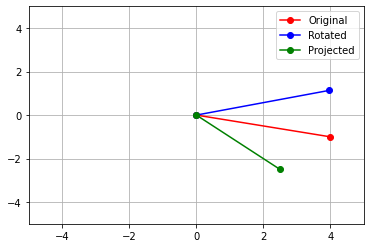

In [6]:
rotated = rotation_matrix.dot(v)
projected = proj_matrix.dot(v)
plt.plot((0,v[0]), (0,v[1]), 'ro-', label="Original")
plt.plot((0,rotated[0]), (0,rotated[1]), 'bo-', label="Rotated")
plt.plot((0,projected[0]), (0,projected[1]), 'go-', label="Projected")
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.grid()
plt.legend()
plt.show()

### d.

In [7]:
def l2_norm(vector):
    return np.sqrt(sum(vector**2))

print("(L2) Norm of original vector: {}".format(l2_norm(v)))
print("(L2) Norm of rotated vector: {}".format(l2_norm(rotated)))
print("(L2) Norm of projected vector: {}".format(l2_norm(projected)))

(L2) Norm of original vector: 4.123105625617661
(L2) Norm of rotated vector: 4.123105625617661
(L2) Norm of projected vector: 3.5355339059327378


* The norm of the vector does not change when we rotate it.
* The norm of the vector decreases when we project it onto a vector other than itself. 

### e.

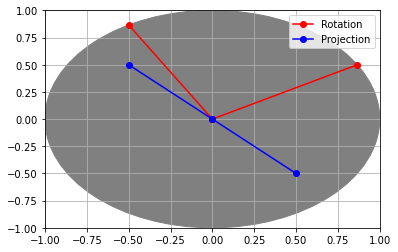

In [8]:
f, ax = plt.subplots(1)
ax.plot((0,rotation_matrix.T[0][0]), (0,rotation_matrix.T[0][1]), 'ro-', label="Rotation")
ax.plot((0,rotation_matrix.T[1][0]), (0,rotation_matrix.T[1][1]), 'ro-')
ax.plot((0,proj_matrix.T[0][0]), (0,proj_matrix.T[0][1]), 'bo-', label="Projection")
ax.plot((0,proj_matrix.T[1][0]), (0,proj_matrix.T[1][1]), 'bo-')
ax.add_artist(plt.Circle((0, 0), 1, color="gray")) # Unit circle
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.grid()
plt.legend()
plt.show()

* The columns of the rotation matrix is perpendicular to each other since the x and y axices are perpendicular to each other. It can be tought as the rotation of the coordinate system as well. Also, they have unit length which do not cause a change in the norm of the rotated vector.
* The columns of the projection matrix have the same direction but in opposite ways. In addition, the direction the columns is the same with the vector to be projected onto. Note that, the norm of the columns are less than 1, which causes a decrease in the norm of projected vector.

## Question 2:

In [9]:
np.random.seed(42)
v = np.random.standard_normal(size=(5))
v

array([ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337])

### a.

In [10]:
S = np.array([
    [0, 0, 0, 0, 1],
    [0, 1, 0, 0, 0],
    [1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 0, 1, 0]
], dtype="float64")
v_s = S.dot(v)
v_s

array([-0.23415337, -0.1382643 ,  0.49671415,  0.64768854,  1.52302986])

### b.

In [11]:
K = np.eye(5)[::-1]
K

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [12]:
v_k = K.dot(v_s)
v_k

array([ 1.52302986,  0.64768854,  0.49671415, -0.1382643 , -0.23415337])

### c.

In [13]:
v_z = S.dot(K.dot(v))
v_z

array([ 0.49671415,  1.52302986, -0.23415337,  0.64768854, -0.1382643 ])

$ v_k $ and $v_z$ are different as expected because matrix multiplication is not commutative.
$
K \times (S \times v) \neq S \times (K \times v)
$

### d.

In [14]:
S_hat = np.array([
    K.dot(row) for row in S
], dtype="float64")
S_hat

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [15]:
v_h = S_hat.dot(v)
v_h

array([ 0.49671415,  1.52302986, -0.23415337,  0.64768854, -0.1382643 ])

### e.

Matrix multiplication has the associativity property:
$ \\
S \times (K \times v) = (S \times K) \times v = \hat{S} \times v
$

## Question 3:

In [16]:
v = np.array([1, -4, 3, 7, 0, -3], dtype="float64")

### a.

In [17]:
T = np.array([
    [0.1, 0.3, 0.6, 0, 0, 0],
    [0, 0.1, 0.3, 0.6, 0, 0],
    [0, 0, 0.1, 0.3, 0.6, 0],
    [0, 0, 0, 0.1, 0.3, 0.6]
], dtype="float64")
v_hat = T.dot(v)
v_hat

array([ 0.7,  4.7,  2.4, -1.1])

In [18]:
T

array([[0.1, 0.3, 0.6, 0. , 0. , 0. ],
       [0. , 0.1, 0.3, 0.6, 0. , 0. ],
       [0. , 0. , 0.1, 0.3, 0.6, 0. ],
       [0. , 0. , 0. , 0.1, 0.3, 0.6]])

### b.

If T is a linear function then it has to satisfy superposition propertity:
$
f(\alpha x + \beta y) = \alpha f(x) + \beta f(y)
$

In [19]:
x = np.random.normal(size=6)
y = np.random.normal(size=6)
alpha = np.random.randint(1)
beta = np.random.randint(1)

In [20]:
lhs = T.dot(alpha * x + beta * y)
rhs = alpha * T.dot(x) + beta * T.dot(y)

In [21]:
if list(lhs) == list(rhs):
    print("T is linear")
else:
    print("T is not linear")

T is linear


In fact, T does a convolution operation and convolution is a linear operation.

### c.

For a $\hat{T}$, \
if $
 \hat{T}\hat{v} = v = \hat{T}Tv = v
$ 
 then, \
 $
\hat{T}T = I
$ (Identity Matrix) \
To satisfy this $\hat{T}$ must be equal to left inverse of $T$. ($T$ does not have an inverse matrix since it is not a square matrix.)

If the columns of $T$ are linearly independent then it has left inverse. However, its columns are not independent.

To show that, we can use the QR-decomposition we wrote in the first assignment.

In [22]:
def gram_schmidt(matrix):
    
    transpose = np.copy(matrix).T
    
    Q = []
    
    for i, column in enumerate(transpose):
        # Step 1 : Orthogonalization
        q_tilda = column
        
        for prev in Q:
            q_tilda -= np.dot(prev.T, column) * prev
            
        # Step 2 : Linear dependence test
        if l2_norm(q_tilda) == 0: # Check if all zero
            print("Linear Dependence found in column {}!".format(i))
            return np.array(Q).T
        
        # Step 3 : Normalization
        q_norm = q_tilda/l2_norm(q_tilda)
        Q.append(q_norm)
        
    return np.array(Q).T


def qr_decomposition(matrix):
    Q = gram_schmidt(matrix)
    R = np.dot(Q.T, matrix)
    
    return Q, R

In [23]:
q, r = qr_decomposition(T)

Linear Dependence found in column 4!


### d.

$
\hat{T} \times \hat{v} = v 
$

$v$ is a $(6\times1)$ vector and $\hat{v}$ is $(4\times1)$ vector. Thus $\hat{T}$ must have the size of $(6\times 4)$. Thus it is a tall matrix. 
Then $
\hat{T} \times \hat{v} = v 
$ is over-determined.

### e.

An approximate least square solution of 
$
T \times v = \hat{v}
$
is
$
\widetilde{v} = T^{\dagger}\hat{v}
$. However, since T is a wide matrix it has only have right (pseudo-) inverse
$
T^{\dagger} = (T^{T}T)^{-1}T^{T}
$.

In [24]:
T_dagger = T.T.dot(np.linalg.inv(T.dot(T.T)))
print("T_dagger: \n{}".format(T_dagger))

T_dagger: 
[[ 0.27750658 -0.13845465  0.02370752  0.00723631]
 [ 0.69406508 -0.06896774 -0.07977855  0.04541643]
 [ 1.27338303  0.05755964  0.03593802 -0.02391427]
 [-0.75236903  1.64938147 -0.00467259  0.00438773]
 [ 0.16395401 -0.83428401  1.66301329  0.00179185]
 [ 0.04341783  0.14224509 -0.83072788  1.66503946]]


In [25]:
v_tilde = T_dagger.dot(v_hat)
print("V_tilde: \n{}".format(v_tilde))

V_tilde: 
[-0.40754414 -0.07972939  1.27445538  7.20939387  0.18289383 -3.1263459 ]


### f.

According to equation $
 \hat{T}\hat{v} = v$ \
 $ \hat{T}Tv = v
$ \
$\hat{T}$ is left (pseudo-)inverse of T. However, since T is a wide matrix it can only have a right inverse. Thus $\hat{T}$ is not (pseudo-)inverse of T.

## Question 4:

### a.

Not invertible. If $A = -B$ then $ A + B = 0$\
$0$ matrix is not invertible.

### b.

Invertible.
$
\begin{bmatrix}
A & 0 \\
0 & B
\end{bmatrix}
$
$
\begin{bmatrix}
A^{-1} & 0 \\
0 & B^{-1}
\end{bmatrix}
$
$
=
\begin{bmatrix}
AA^{-1} & 0 \\
0 & BB^{-1}
\end{bmatrix}
$
$
=
\begin{bmatrix}
I & 0 \\
0 & I
\end{bmatrix}
= I
$


### c.

Invertible. 
By doing row operations:
$
\begin{bmatrix}
A & 0 \\
A+B & B
\end{bmatrix}
$
$
=
\begin{bmatrix}
A & 0 \\
B & B
\end{bmatrix}
$ 
and \
$
\begin{bmatrix}
A & 0 \\
B & B
\end{bmatrix}^{T}
=
$
$
\begin{bmatrix}
A & B \\
0 & B
\end{bmatrix}
$
-> Apply row operations:
$
\begin{bmatrix}
A & 0 \\
0 & B
\end{bmatrix}
$\
Transpose back:
$
\begin{bmatrix}
A & 0 \\
0 & B
\end{bmatrix}^{T}
=
\begin{bmatrix}
A & 0 \\
0 & B
\end{bmatrix}
$
, which is the same as the matrix given in section 4.b, which is invertible. 

### d.

Invertible. Since $A$ and $B$ are square matrices, $(ABA)^{-1} = A^{-1}B^{-1}A^{-1}$

## Question 5:

### a.

In [26]:
x = np.linspace(-1, 1, 20)

### b.

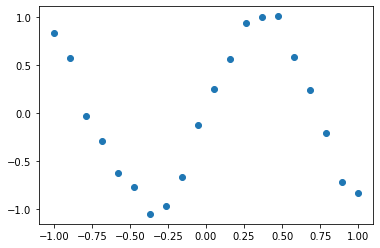

In [41]:
period = 1.5
sigma = 0.1
epsilon = np.random.normal(0, sigma, size = x.shape)
y = np.sin(2*np.pi*x/period) + epsilon
plt.scatter(x, y)
plt.show()

### c.

In [28]:
def vandermonde(vector, degree):
    return np.array([vector**i for i in range(degree)]).T
V = np.vander(x, 10, increasing=True)#vandermonde(x, 10)
print(V.shape)

(20, 10)


### d.

In [29]:
q, r = np.linalg.qr(V)

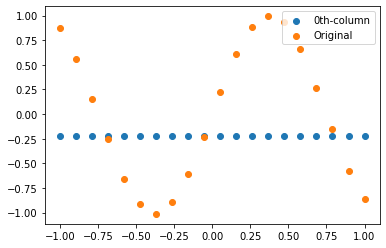

In [30]:
plt.scatter(x, q.T[0], label="0th-column")
plt.scatter(x, y, label="Original")
    
plt.legend(loc=1)
plt.show()

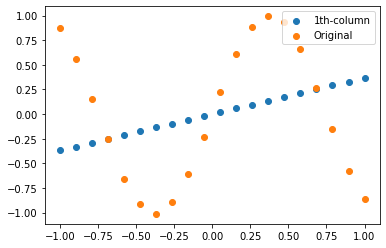

In [31]:
plt.scatter(x, q.T[1], label="1th-column")
plt.scatter(x, y, label="Original")
    
plt.legend(loc=1)
plt.show()

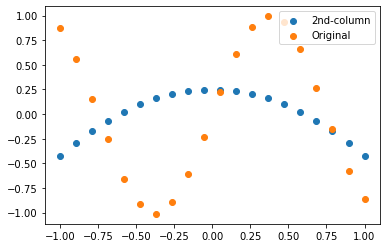

In [32]:
plt.scatter(x, q.T[2], label="2nd-column")
plt.scatter(x, y, label="Original")
    
plt.legend(loc=1)
plt.show()

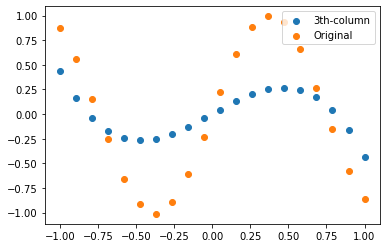

In [33]:
plt.scatter(x, q.T[3], label="3th-column")
plt.scatter(x, y, label="Original")
    
plt.legend(loc=1)
plt.show()

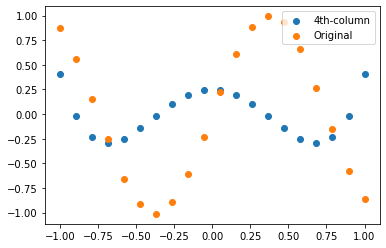

In [34]:
plt.scatter(x, q.T[4], label="4th-column")
plt.scatter(x, y, label="Original")
    
plt.legend(loc=1)
plt.show()

### e.

If $ y = Qc^{(j)} $ then $ Q^{-1}y = c^{(j)}$\
Then we can obtain $y^{(j)} = Qc^{(j)}$

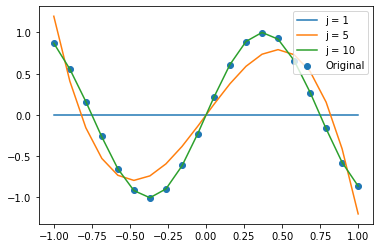

In [35]:
c = np.linalg.pinv(q).dot(y)
c_1 = c.copy()
c_1[1:] = 0
c_5 = c.copy()
c_5[5:] = 0
c_10 = c.copy()

plt.scatter(x, y, label="Original")
plt.plot(x, q.dot(c_1), label = "j = 1")
plt.plot(x, q.dot(c_5), label = "j = 5")
plt.plot(x, q.dot(c_10), label = "j = 10")
plt.legend(loc=1)
plt.show()

In [36]:
def abs_error(original, pred):
    return np.sum(np.abs(original-pred))

print("Error when j=1 : {}".format(abs_error(y, q.dot(c_1))))
print("Error when j=5 : {}".format(abs_error(y, q.dot(c_5))))
print("Error when j=10 : {}".format(abs_error(y, q.dot(c_10))))

Error when j=1 : 12.3351292825374
Error when j=5 : 4.332901948009549
Error when j=10 : 0.12662360615665313


As expected when we increase the order of the polynomial used in the model, the error decreases, meaning that the model fits the data in a better way.

### f.

We can apply the formula we adapted in question 5.e. Instead of $Q$, we use $V$.

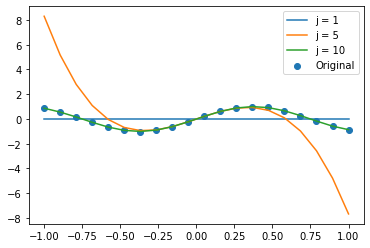

In [37]:
c = np.linalg.pinv(V).dot(y)
c_1 = c.copy()
c_1[1:] = 0
c_5 = c.copy()
c_5[5:] = 0
c_10 = c.copy()

plt.scatter(x, y, label="Original")
plt.plot(x, V.dot(c_1), label = "j = 1")
plt.plot(x, V.dot(c_5), label = "j = 5")
plt.plot(x, V.dot(c_10), label = "j = 10")
plt.legend(loc=1)
plt.show()

In [38]:
print("Error when j=1 : {}".format(abs_error(y, V.dot(c_1))))
print("Error when j=5 : {}".format(abs_error(y, V.dot(c_5))))
print("Error when j=10 : {}".format(abs_error(y, V.dot(c_10))))

Error when j=1 : 12.335129282537402
Error when j=5 : 32.51588836771971
Error when j=10 : 0.1266236061566654


Using $Q$ to approximate $y$ worked better compared to $V$, especially when $j$ is 5. Since $Q$ is **orthogonal matrix**, its columns (are orthonormal) represented better the features of the data samples.

$V$ and $Q$ span the same subspace because we can construct every column of $V$ using a linear combination of the columns of $Q$. Thus, they both span the same subspace.